## Text Analysis Complains

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

In [3]:
# Wordcloud python library
from wordcloud import WordCloud

In [4]:
import plotly.express as px

In [5]:
cis_complaints = pd.read_excel('ftc_data/00612_redacted_covid_19_complaints.xlsx', sheet_name='CIS Complaints', header=0)
idt_complaints = pd.read_excel('ftc_data/00612_redacted_covid_19_complaints.xlsx', sheet_name='IDT Complaints', header=0)
dnc_complaints = pd.read_excel('ftc_data/00612_redacted_covid_19_complaints.xlsx', sheet_name='DNC Complaints', header=0)

In [6]:
list_complaints = []
list_complaints.extend(list(cis_complaints['Complaint Info Comments']))
list_complaints.extend(list(idt_complaints['Theft Activity Comments']))
list_complaints.extend(list(dnc_complaints['Other Information Comments']))
list_complaints = [str(i).lower() for i in list_complaints]

In [7]:
def clean_text_round(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
#    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('<.*?>', ' ', text)
#    text = re.sub('\\n', ' ', text) 
    text = re.sub('\n', ' ', text) 
    text = re.sub('\t', ' ', text) 
    text = re.sub('\(b\)\(6\)', ' ', text) 
    text = re.sub('&quot', ' ', text) 
    text = re.sub('---', ' ', text)
    #text = re.sub('wa', ' ', text) 
    return text

In [8]:
stop_words = set(stopwords.words('english')) 
your_list = ['additional','comments','br','gt'] 
for i, line in enumerate(list_complaints): 
    list_complaints[i] = ' '.join([str(x).lower() for 
        x in nltk.word_tokenize(line) if 
        ( x not in stop_words ) and ( x not in your_list )]) 

In [9]:
list_complaints = [clean_text_round(text) for text in list_complaints]

In [10]:
list_complaints[0]

'recently purchased flights swoop wife travel phoenix , az . several weeks later , covid-  crisis became pandemic travel recommended . international travel deemed non-essential military persons cancelled precaution covid-  . & #   ; trying reach swoop   days order cancel flights , receive credit , re-book later date . customer service phone line recording states company receiving calls time , recommends contacting facebook . facebook contact , states placed digital queue contacted shortly . queue   hours response . way contact company deal issues , also one airlines amend policy & #   ; deal covid-  pandemic . completely unprofessional unacceptable customer service . & #   ; trying cancel tickets . -- - : would completely satisfied refund tickets well pre-purchased add-ons luggage seat selection . would somewhat satisfied refund pre-purchased add-ons credit flights re-book later date .'

In [11]:
# Getting n-grams table
def ngrams_table(n, list_texts):
    vectorizer = CountVectorizer(ngram_range = (n,n)) 
    X1 = vectorizer.fit_transform(list_texts)  
    features = vectorizer.get_feature_names()
    # Applying TFIDF 
    vectorizer = TfidfVectorizer(ngram_range = (n,n)) 
    X2 = vectorizer.fit_transform(list_texts) 
    # Getting top ranking features 
    sums1 = X1.sum(axis = 0) 
    sums2 = X2.sum(axis = 0) 
    data = [] 
    for col, term in enumerate(features): 
        data.append( (term, sums1[0,col], sums2[0,col] )) 

    return pd.DataFrame(data, columns = ['term','rankCount', 'rankTFIDF']).sort_values('rankCount', ascending = False).reset_index(drop=True)

## Frequency of terms in complaints

In [12]:
table_1grams = ngrams_table(1, list_complaints)

In [13]:
# Dfining wordcloud object
wc = WordCloud(background_color="white", 
               colormap="Dark2", 
               max_font_size=60, 
               random_state=42)

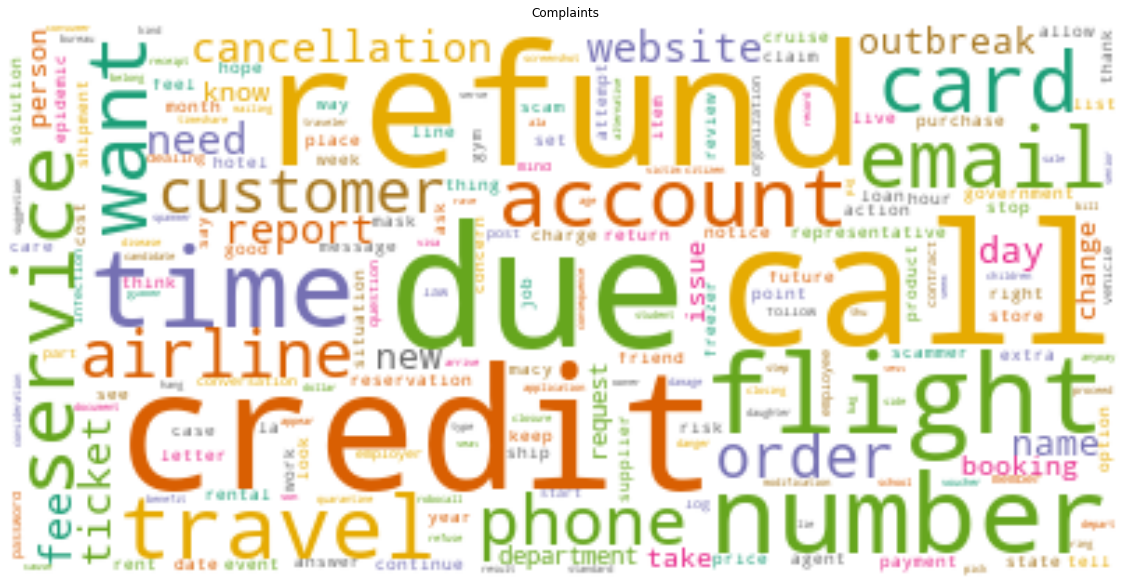

In [14]:
text_complaints = ' '.join([i for i in table_1grams['term']])
wc.generate(text_complaints)
plt.figure(figsize=(20,16))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Complaints')
plt.show()

In [15]:
table_1grams.head(20)

term  rankCount  rankTFIDF
0        refund        201  10.230796
1   coronavirus        164  12.523902
2          call        133  10.200284
3         would        123   6.349337
4           due        118   7.934794
5        credit        107   8.893769
6           get        105   6.383168
7        flight        101   5.212184
8          back         89   4.807804
9        cancel         85   4.578479
10         said         82   7.563221
11      company         79   4.952846
12       number         79   6.088824
13         told         78   4.363980
14         time         77   5.172546
15       called         75   4.639485
16       travel         73   3.596445
17      account         71   6.528610
18        covid         69   6.657087
19        china         68   3.815473

In [16]:
px.bar(table_1grams.head(20), 'term', 'rankCount')

## Frequency of 2-consecutive-words terms in complaints

In [17]:
table_2grams = ngrams_table(2, list_complaints)

In [18]:
# Dfining wordcloud object
wc = WordCloud(background_color="white", 
               colormap="Dark2", 
               max_font_size=60, 
               random_state=42)

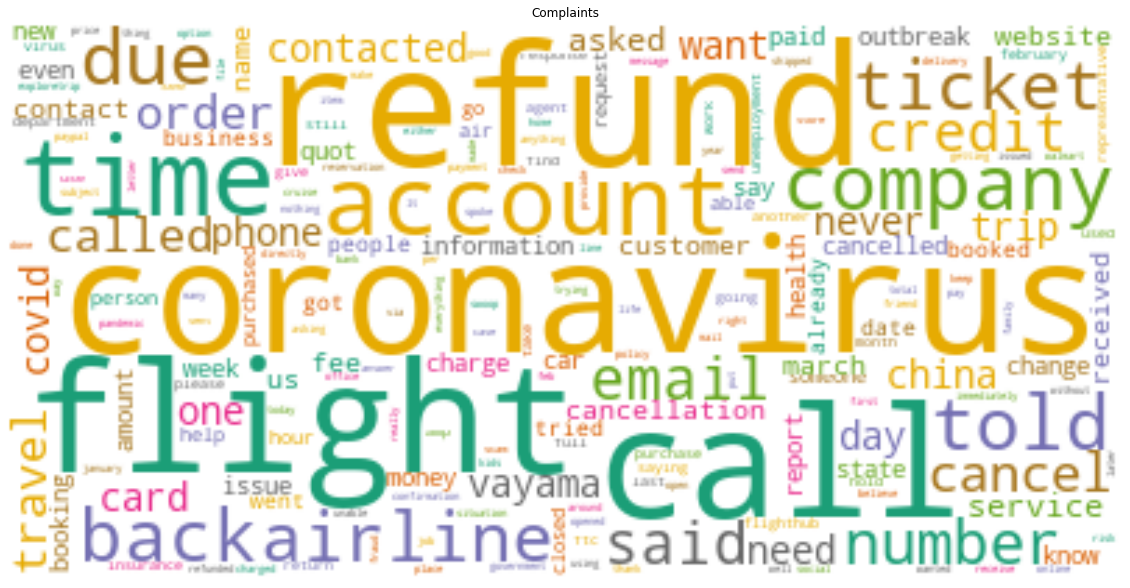

In [19]:
text_complaints = ' '.join([i for i in table_2grams['term']])
wc.generate(text_complaints)
plt.figure(figsize=(20,16))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Complaints')
plt.show()

In [20]:
table_2grams.head(20)

term  rankCount  rankTFIDF
0            credit card         42   3.603702
1       customer service         40   2.740659
2            full refund         39   2.147768
3        due coronavirus         38   3.180489
4         subject matter         31   4.373456
5            matter call         31   4.373456
6          credit report         27   3.348916
7             would like         23   1.596497
8              due covid         21   2.221384
9            please help         20   2.485352
10       social security         19   1.932405
11         china eastern         18   1.224097
12            air france         16   0.808437
13            get refund         16   1.101331
14      cancellation fee         16   0.964270
15  coronavirus outbreak         16   1.231780
16             air china         15   0.909638
17          scammer said         15   3.239319
18             call back         14   1.181355
19             hong kong         13   0.926775

In [21]:
px.bar(table_2grams.head(20), 'term', 'rankCount')

## Frequency of 3-consecutive-words terms in complaints

In [22]:
table_3grams = ngrams_table(3, list_complaints)

In [25]:
table_3grams.head(20)

term  rankCount  rankTFIDF
0                subject matter call         31   4.431367
1       government businesses family         10   1.273609
2          businesses family friends         10   1.273609
3              call calls pretending         10   1.273609
4        calls pretending government         10   1.273609
5                  matter call calls         10   1.273609
6   pretending government businesses         10   1.273609
7             social security number          9   1.107664
8                    please help get          9   1.274533
9                apply loan declined          8   1.230906
10                 take loan visited          8   1.230906
11                 report time check          8   1.230906
12              brought today please          8   1.230906
13            payments brought today          8   1.230906
14                  scammer said ftc          8   1.997432
15                 today please help          8   1.230906
16        defaulted payments brought          8   1.230906
17                  help get account          8   1.230906
18                 website paid copy          8   1.230906
19                  paid copy credit          8   1.230906

In [24]:
px.bar(table_3grams.head(20), 'term', 'rankCount')